<a href="https://colab.research.google.com/github/Legacywave1/Satellite-imagery/blob/main/Copy_of_notebookcfcd62f5d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# # RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
# import kagglehub
# kagglehub.login()


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# ankucyprian_satellite_path = kagglehub.dataset_download('ankucyprian/satellite')

# print('Data source import complete.')


In [4]:
!pip install patchify

In [5]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical

In [6]:
#!ls -lah '/content/drive/MyDrive/Dataset/Semantic segmentation dataset'

In [7]:
dataset_root_folder = '/content/drive/MyDrive/Dataset/'

In [8]:
dataset_name = 'Semantic segmentation dataset'

In [9]:
for path, subdir, files  in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(path)
    for i, image in enumerate(images):
      if (image.endswith('jpg')):
        print(image)
        a = True
    #print(images)

/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 7/images
image_part_006.jpg
image_part_003.jpg
image_part_002.jpg
image_part_004.jpg
image_part_008.jpg
image_part_007.jpg
image_part_009.jpg
image_part_005.jpg
image_part_001.jpg
/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 2/images
image_part_005.jpg
image_part_006.jpg
image_part_009.jpg
image_part_003.jpg
image_part_002.jpg
image_part_001.jpg
image_part_008.jpg
image_part_007.jpg
image_part_004.jpg
/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 8/images
image_part_001.jpg
image_part_007.jpg
image_part_004.jpg
image_part_009.jpg
image_part_005.jpg
image_part_003.jpg
image_part_006.jpg
image_part_002.jpg
image_part_008.jpg
/content/drive/MyDrive/Dataset/Semantic segmentation dataset/Tile 5/images
image_part_002.jpg
image_part_009.jpg
image_part_006.jpg
image_part_008.jpg
image_part_007.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_001.jpg
/content/drive/M

In [10]:
import cv2

array([[[ 20,  54, 108],
        [  0,  27,  83],
        [  8,  42, 102],
        ...,
        [177, 182, 183],
        [128, 131, 139],
        [ 87,  91, 102]],

       [[ 22,  53, 108],
        [  0,  26,  82],
        [  8,  39, 100],
        ...,
        [164, 168, 169],
        [119, 122, 130],
        [ 86,  90, 101]],

       [[ 29,  59, 114],
        [  0,  28,  85],
        [ 13,  42, 103],
        ...,
        [164, 169, 168],
        [120, 123, 131],
        [ 98, 100, 111]],

       ...,

       [[101, 100, 104],
        [137, 136, 140],
        [111, 113, 114],
        ...,
        [ 13,   6,  13],
        [ 17,   9,  19],
        [ 22,  14,  24]],

       [[ 86,  85,  89],
        [133, 132, 136],
        [120, 122, 123],
        ...,
        [ 24,  15,  25],
        [ 31,  22,  32],
        [ 31,  22,  32]],

       [[105, 104, 108],
        [101, 100, 104],
        [104, 106, 107],
        ...,
        [ 32,  23,  33],
        [ 37,  28,  38],
        [ 31,  22,  32]]], dtype=uint8)
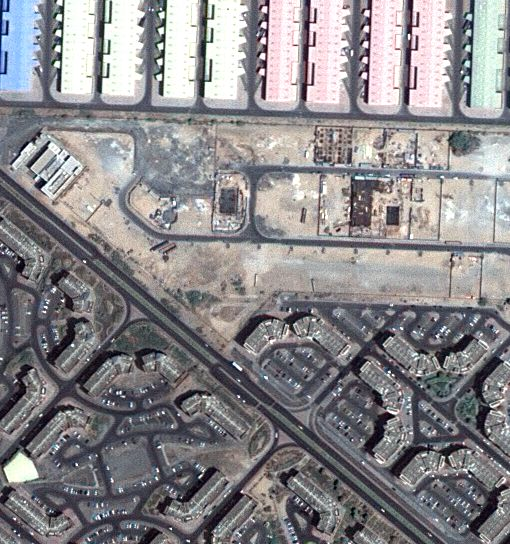

In [11]:
image = cv2.imread(f'{dataset_root_folder}{dataset_name}/Tile 2/images/image_part_002.jpg')
image

In [12]:
import os
import cv2

image_path = os.path.join(dataset_root_folder, dataset_name, "Tile 2", "masks", "image_part_002.png")

if not os.path.exists(image_path):
    print(f"Error: File not found at {image_path}")
else:
    mask = cv2.imread(image_path)
    if mask is None:
        print(f"Error: cv2.imread returned None for {image_path}") # More specific error message
    else:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

In [13]:
image_patch = 256

In [14]:
#((image.shape)[0] // image_patch)

In [15]:
minmaxscaler = MinMaxScaler()

In [16]:
#image_type = 'images'
#image_extension = 'jpg'
image_dataset = []
mask_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,9):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image_dataset.append(image)
        size_x = (image.shape[1] // image_patch)*image_patch
        size_y = (image.shape[0] // image_patch)*image_patch
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        image = np.array(image)
        patched_images = patchify(image, (image_patch, image_patch, 3), step = image_patch)
        #print('({}, {})'.format(image.size[0], image.size[1]))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              single_patch_image = patched_images[i,j,:,:]
              #print(single_patch_image.shape)
              single_patch_image = minmaxscaler.fit_transform(single_patch_image.reshape(-1, single_patch_image.shape[-1])).reshape(single_patch_image.shape)
              single_patch_image = single_patch_image[0]
              #print(single_patch_image)

              image_dataset.append(single_patch_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [17]:
len(image_dataset)
len(mask_dataset)

1305

In [18]:
#image_dataset[0]

In [19]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [20]:
len(mask_dataset)

1305

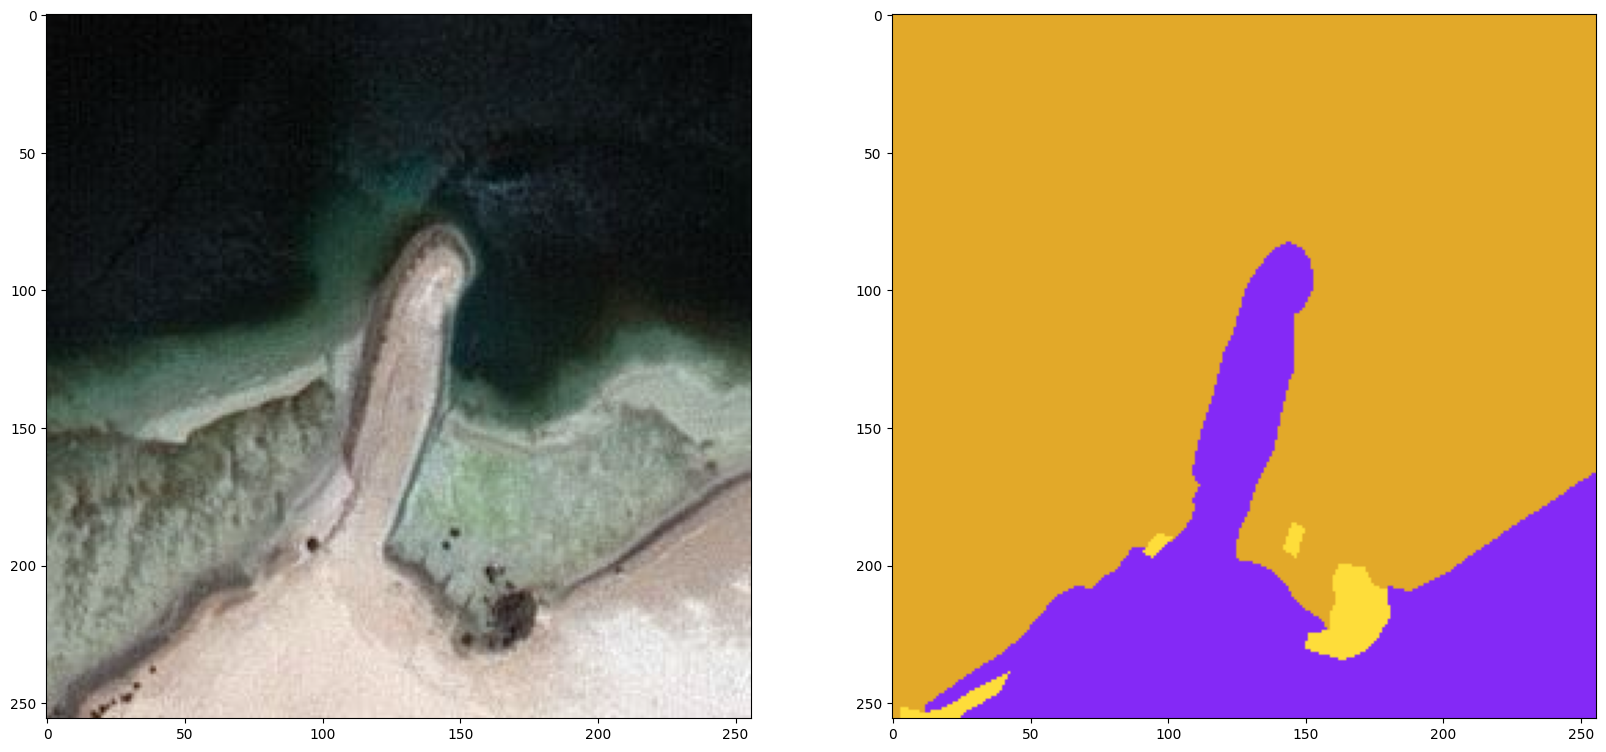

In [21]:
random_index = random.randint(0, len(image_dataset)-1)
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(image_dataset[random_index]);

plt.subplot(122)
plt.imshow(mask_dataset[random_index]);
plt.show()

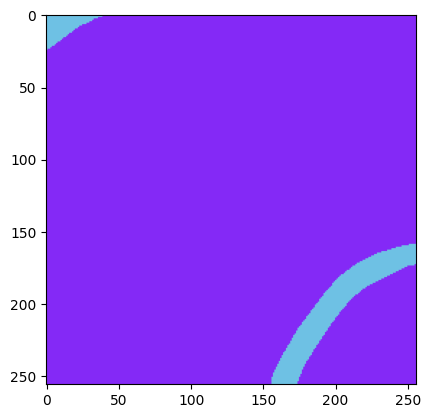

In [22]:
plt.imshow(mask_dataset[5]);

In [23]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [24]:

#print(len(labels))

In [25]:
label = individual_patched_mask

In [26]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [27]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [28]:
labels = np.array(labels)

In [29]:
labels = np.expand_dims(labels, axis = 3)

In [30]:
labels

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [5],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [2],


In [31]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

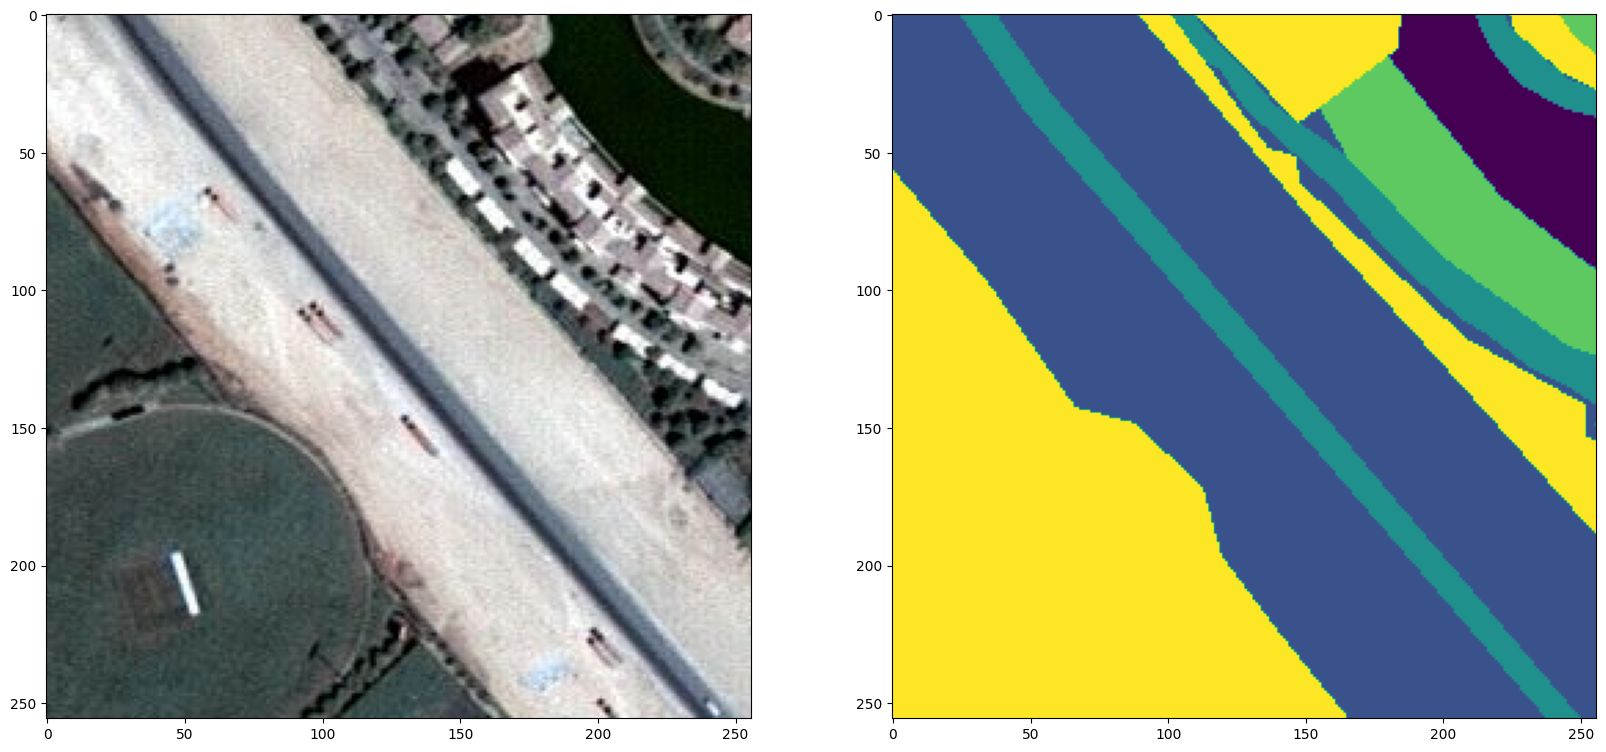

In [32]:
random_index = random.randint(0, len(image_dataset)-1)
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(image_dataset[random_index]);

plt.subplot(122)
plt.imshow(labels[random_index][:,:,0]);
plt.show()

In [33]:
total_classes = len(np.unique(labels))
total_classes

6

In [34]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [35]:
master_training_dataset = image_dataset

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_text, y_train, y_test = train_test_split(image_dataset, labels_categorical_dataset, test_size = 0.20, random_state = 42)

In [37]:
print(x_train.shape)
print(x_text.shape)
print(y_train.shape)
print(y_test.shape)
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]

(1044, 256, 256, 3)
(261, 256, 256, 3)
(1044, 256, 256, 6)
(261, 256, 256, 6)


In [38]:
!pip install segmentation-models
#!pip install keras==2.4.3
#!pip install tensorflow==2.8.4

In [39]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [40]:
from keras import backend as K

In [41]:
from tensorflow.keras import layers

In [42]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = tf.keras.layers.Flatten()(y_true)
  y_pred_flatten = tf.keras.layers.Flatten()(y_pred)
  intersection = tf.math.reduce_sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (tf.math.reduce_sum(y_true_flatten) + tf.math.reduce_sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [43]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [44]:
metrics = ["accuracy", jaccard_coef]

In [45]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [46]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [47]:
model = get_deep_learning_model()

In [48]:
# model.get_config()

Generating Loss Function

In [49]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [50]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [51]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [52]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [53]:
total_loss = dice_loss + (1 * focal_loss)

## Model Compilation

In [54]:
import tensorflow as tf

In [55]:
tf.keras.backend.clear_session()

In [56]:
model.compile(optimizer = 'adam', loss = total_loss, metrics = metrics)

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model_history = model.fit(x_train, y_train, batch_size = 16, verbose = 1, epochs = 100, validation_data= (x_text, y_test), shuffle = False)

Epoch 1/100
 9/66 [===>..........................] - ETA: 10:09 - loss: 1.0330 - accuracy: 0.3216 - jaccard_coef: 0.1438

In [ ]:
history_a = model_history

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label ='Training loss')
plt.plot(epochs, val_loss, 'y', label ='Validation loss')
#plt.xlabel("Epochs")  # Correct usage
#plt.ylabel("Loss")
#plt.title("Training and validation loss")
plt.legend() # Add a legend to differentiate the lines
plt.show()

In [ ]:
Jaccard_coef_loss= history_a.history['jaccard_coef']
Jaccard_val_loss = history_a.history['val_jaccard_coef']
epochs = range(1, len(loss)+1)
plt.plot(epochs,Jaccard_coef_loss , 'y', label ='Jaccard Training loss')
plt.plot(epochs, Jaccard_val_loss, 'r', label ='Jaccard Validation loss')
#plt.xlabel("Epochs")  # Correct usage
#plt.ylabel("Loss")
#plt.title("Training and validation loss")
plt.legend() # Add a legend to differentiate the lines
plt.show()

In [ ]:
y_pred = model.predict(x_text)

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 3)

In [ ]:
y_test_argmax = np.argmax(y_test, axis = 3)

In [ ]:
test_image_number = random.randint(0, len(x_text))

test_image = x_text[test_image_number]
grounded_truth = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, axis = 0)
prediction = model.predict(test_image_input)
prediction_argmax = np.argmax(prediction, axis = 3)
prediction_argmax = prediction_argmax[0,:,:]

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(231)
plt.imshow(test_image)
#plt.title('Original Image')

plt.subplot(232)
plt.imshow(grounded_truth)
#plt.title('Supposed masked image')

plt.subplot(233)
plt.imshow(prediction_argmax)
#plt.title('Predicted Image')
plt.show()

In [ ]:
model.save('Satellite_segmentation_full.h5')